In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import random
import cv2

In [12]:
# load the pre-trained network
print("[INFO] loading pre-trained network...")
model = load_model('/content/gdrive/My Drive/app/malaria-SotXuatHuyet/modelResnet.model')

[INFO] loading pre-trained network...


In [0]:
model.summary()

In [17]:
# grab all image paths in the input directory and randomly sample them
imagePaths = list(paths.list_images('/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing'))
print(imagePaths)
random.shuffle(imagePaths)
imagePaths = imagePaths[:16]
 
# initialize our list of results
results = []

['/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C103P64ThinF_IMG_20150918_164331_cell_153.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C120P81ThinF_IMG_20151002_131120_cell_159.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C106P67ThinF_IMG_20150924_102413_cell_9.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C115P76ThinF_IMG_20150930_163018_cell_103.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C108P69ThinF_IMG_20150924_223834_cell_195.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C107P68ThinF_IMG_20150924_222630_cell_50.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C111P72ThinF_IMG_20150930_113610_cell_99.png', '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C110P71ThinF_IMG_20150930_110404_cell_70.pn

In [0]:
# loop over our sampled image paths
for p in imagePaths:
	# load our original input image
	orig = cv2.imread(p)
 
	# pre-process our image by converting it from BGR to RGB channel
	# ordering (since our Keras mdoel was trained on RGB ordering),
	# resize it to 64x64 pixels, and then scale the pixel intensities
	# to the range [0, 1]
	image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (64, 64))
	image = image.astype("float") / 255.0

	# order channel dimensions (channels-first or channels-last)
	# depending on our Keras backend, then add a batch dimension to
	# the image
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
 
	# make predictions on the input image
	pred = model.predict(image)
	pred = pred.argmax(axis=1)[0]
 
	# an index of zero is the 'parasitized' label while an index of
	# one is the 'uninfected' label
	label = "Parasitized" if pred == 0 else "Uninfected"
	color = (0, 0, 255) if pred == 0 else (0, 255, 0)
 
	# resize our original input (so we can better visualize it) and
	# then draw the label on the image
	orig = cv2.resize(orig, (128, 128))
	cv2.putText(orig, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
		color, 2)
 
	# add the output image to our list of results
	results.append(orig)
  

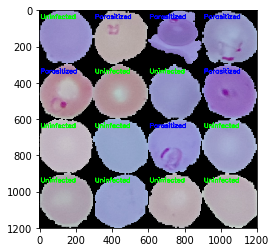

In [15]:
import matplotlib.pyplot as plt
# create a montage using 128x128 "tiles" with 4 rows and 4 columns
montage = build_montages(results, (300, 300), (4, 4))[0]
 
# show the output montage
plt.imshow(montage)
plt.savefig('/content/gdrive/My Drive/app/malaria-SotXuatHuyet/test.png')

0


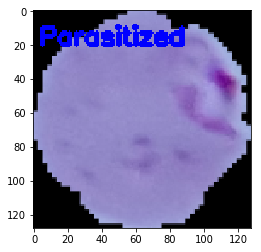

In [41]:
orig = cv2.imread('/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Parasitized/C126P87ThinF_IMG_20151004_105100_cell_129.png')
#plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap=plt.cm.Greys)
image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (64, 64))
image = image.astype("float") / 255.0

	# order channel dimensions (channels-first or channels-last)
	# depending on our Keras backend, then add a batch dimension to
	# the image
image = img_to_array(image)
#print(image)
image = np.expand_dims(image, axis=0)
#print(image.shape())


# make predictions on the input image
pred = model.predict(image)
pred = pred.argmax(axis=1)[0]

	# an index of zero is the 'parasitized' label while an index of
	# one is the 'uninfected' label
label = "Parasitized" if pred == 0 else "Uninfected"
color = (0, 0, 255) if pred == 0 else (0, 255, 0)

	# resize our original input (so we can better visualize it) and
	# then draw the label on the image
orig = cv2.resize(orig, (128, 128))
cv2.putText(orig, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
		color, 2)

plt.imshow(orig)
print(pred)

In [0]:
def test(image_path):
  orig = cv2.imread(image_path)
  #plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap=plt.cm.Greys)
  image = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (64, 64))
  image = image.astype("float") / 255.0

    # order channel dimensions (channels-first or channels-last)
    # depending on our Keras backend, then add a batch dimension to
    # the image
  image = img_to_array(image)
  #print(image)
  image = np.expand_dims(image, axis=0)
  #print(image.shape())


  # make predictions on the input image
  pred = model.predict(image)
  pred = pred.argmax(axis=1)[0]

    # an index of zero is the 'parasitized' label while an index of
    # one is the 'uninfected' label
  label = "Parasitized" if pred == 0 else "Uninfected"
  color = (0, 0, 255) if pred == 0 else (0, 255, 0)

    # resize our original input (so we can better visualize it) and
    # then draw the label on the image
  orig = cv2.resize(orig, (128, 128))
  cv2.putText(orig, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
      color, 2)

  plt.imshow(orig)
  print(pred)

0


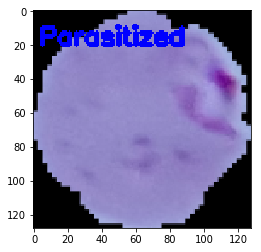

In [45]:
test('/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Parasitized/C126P87ThinF_IMG_20151004_105100_cell_129.png')

1


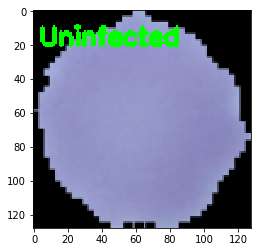

In [47]:
test( '/content/gdrive/My Drive/app/malaria-SotXuatHuyet/malaria/testing/Uninfected/C66P27N_ThinF_IMG_20150818_164754_cell_163.png')